In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
# Read and Merge Data Files
study_data = pd.read_csv('Data/Study_results.csv')
mouse_data = pd.read_csv('Data/Mouse_metadata.csv')
merged_data = pd.merge(study_data, mouse_data, how='inner')
merged_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Find the Number of Unique Mice
unique_mice = merged_data['Mouse ID'].nunique()
unique_mice

249

In [4]:
# Find Duplicate IDs
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
cleaned_data = merged_data[merged_data['Mouse ID'] != 'g989']
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
cleaned_mice = cleaned_data['Mouse ID'].nunique()
cleaned_mice

248

In [7]:
# summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleaned_data_mean = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
cleaned_data_median = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
cleaned_data_var = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
cleaned_data_std =  cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
cleaned_data_sem = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

In [8]:
# Dataframe with summary statistics
statistic_df = pd.DataFrame(
    {
        'Mean Tumor Volume': cleaned_data_mean,
        'Meidan Tumor Vol': cleaned_data_median,
        'Variance of Tumor Volume': cleaned_data_var,
        'Standard Deviation of Tumor Volume': cleaned_data_std,
        'Standard Error of Tumor Volume': cleaned_data_sem,
        
    }
)
statistic_df

,Mean Tumor Volume,Meidan Tumor Vol,Variance of Tumor Volume,Standard Deviation of Tumor Volume,Standard Error of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Aggregate method
cleaned_data_agg = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
cleaned_data_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


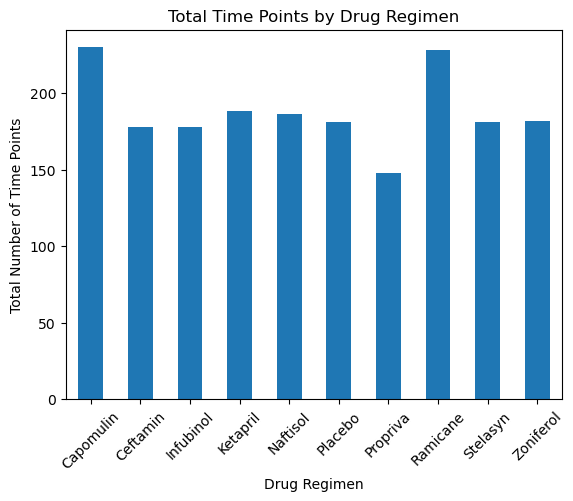

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drugs_by_time_point_pd = cleaned_data.groupby('Drug Regimen').size().reset_index(name='Total Count')
drugs_by_time_point_pd.plot(kind='bar', x= 'Drug Regimen', y='Total Count', legend=False)

plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Time Points')
plt.title('Total Time Points by Drug Regimen')
plt.xticks(rotation=45) 
plt.show()

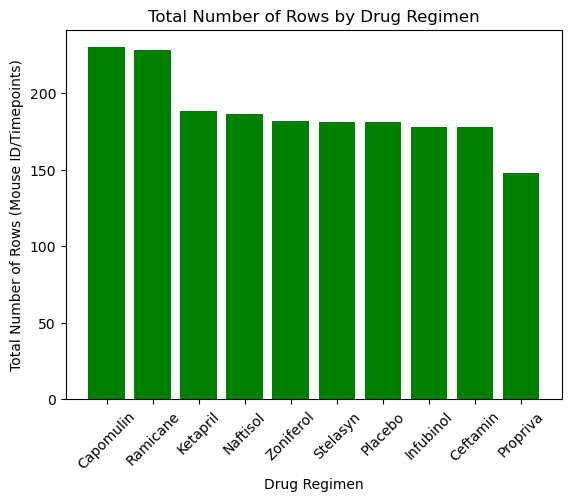

In [11]:
# Bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplo

drugs_by_time_point_matplot = cleaned_data['Drug Regimen'].value_counts()

# Create the bar plot
plt.bar(drugs_by_time_point_matplot.index, drugs_by_time_point_matplot.values, color='green')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows by Drug Regimen')
plt.xticks(rotation=45)  
plt.show()


Text(0.5, 1.0, 'Percent of Mice by Gender')

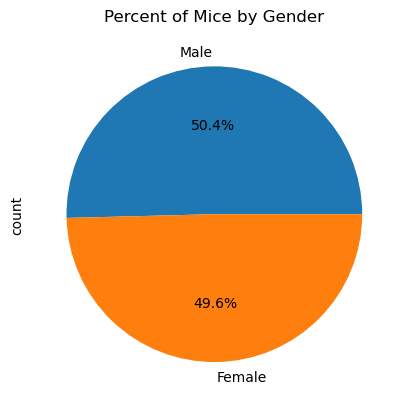

In [12]:
# Get the unique mice with their gender
mouse_gender = cleaned_data.groupby('Mouse ID')['Sex'].first()
gender_counts = mouse_gender.value_counts()

#Plot
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percent of Mice by Gender')

([<matplotlib.patches.Wedge at 0x13fdf55b6e0>,
 [Text(-0.013934097579311132, 1.0999117423341975, 'Male'),
  Text(0.013934097579310996, -1.0999117423341975, 'Female')],
 [Text(-0.007600416861442434, 0.5999518594550168, '50.4%'),
  Text(0.007600416861442361, -0.5999518594550168, '49.6%')])

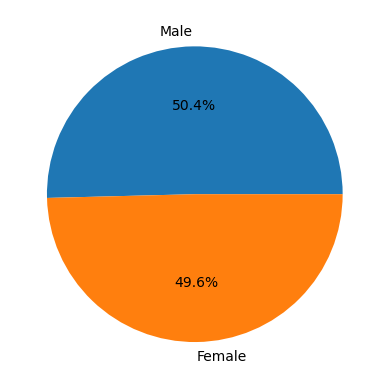

In [13]:
plt.pie(gender_counts, labels=gender_counts.index, autopct = '%1.1f%%')

In [14]:
# Final tumor volume of each mouse across four of the treatment regimens of Capomulin, Ramicane, Infubinol, and Ceftamin
# Find the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

#Filter by regimen

regimens = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
last_time_tumor_volume = last_timepoint_df[last_timepoint_df['Drug Regimen'].isin(regimens)]

#Display
last_time_tumor_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [15]:
# Put Treatments into lost for loop
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
tumor_data = []

# Loop over treatment
for drug in treatments:
    drug_data = cleaned_data[cleaned_data['Drug Regimen'] == drug]
    final_tumor_volume = drug_data.groupby('Mouse ID')['Tumor Volume (mm3)'].last()
   
    # Add subset of tumor volumes
    tumor_data.append(final_tumor_volume)

    # Calculate IQRs
    quartiles = final_tumor_volume.quantile([0.25, 0.5, 0.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr = upper - lower
    # Create Upper and Lower Bounds
    lower_bound = lower - (1.5 * iqr)
    upper_bound = upper + (1.5 * iqr)

    # Find Outliers
    outliers = final_tumor_volume[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
 


Text(0, 0.5, 'Final Tumor Volume (mm3)')

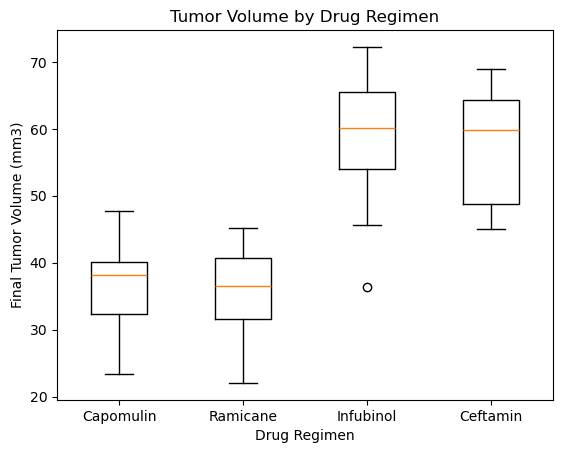

In [16]:
#  Box plot that showing the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_data, labels=treatments)
plt.title('Tumor Volume by Drug Regimen') 
plt.xlabel('Drug Regimen')  
plt.ylabel('Final Tumor Volume (mm3)')

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50')])

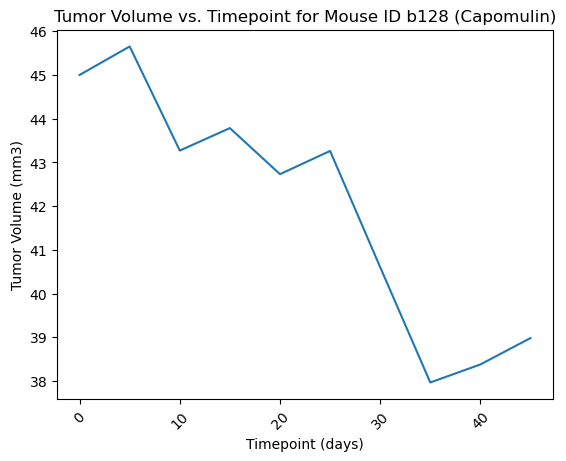

In [17]:
# Line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'b128'  

# Filter the data for the selected mouse and Capomulin treatment
capomulin_data = cleaned_data[(cleaned_data['Mouse ID'] == mouse_id) & (cleaned_data['Drug Regimen'] == 'Capomulin')]

# Generate the line plot
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])
plt.title(f'Tumor Volume vs. Timepoint for Mouse ID {mouse_id} (Capomulin)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(rotation=45)

Text(0, 0.5, 'Average Tumor Volume (mm3)')

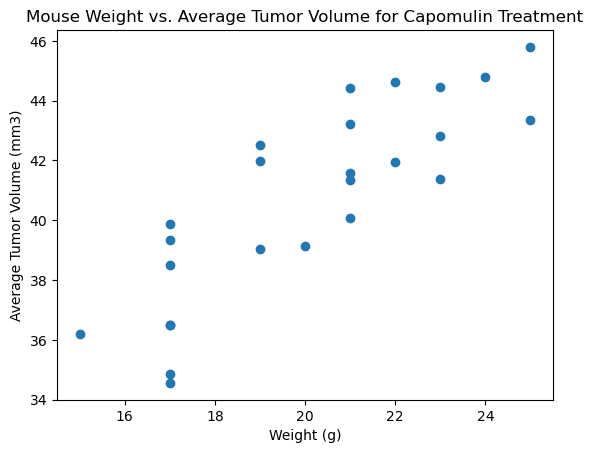

In [18]:
# Scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for Capomulin treatment
capomulin_data2 = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data2.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weights
mouse_weights = capomulin_data2.groupby('Mouse ID')['Weight (g)'].first()  

# Create a DataFrame for plotting
scatter_data = pd.DataFrame({'Weight (g)': mouse_weights, 'Average Tumor Volume (mm3)': average_tumor_volume})

# Generate the scatter plot
plt.scatter(scatter_data['Weight (g)'], scatter_data['Average Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

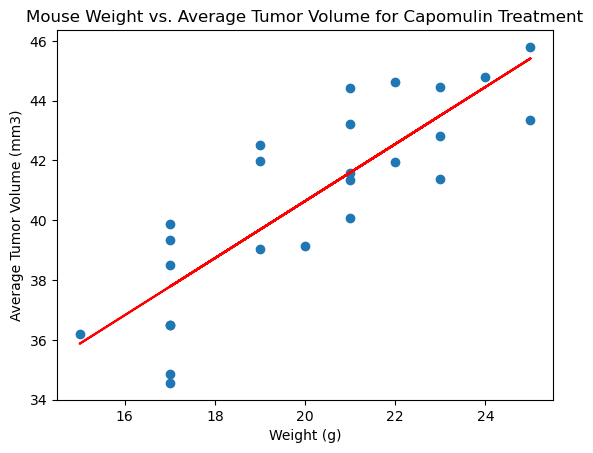

In [19]:

# Scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = np.corrcoef(scatter_data['Weight (g)'], scatter_data['Average Tumor Volume (mm3)'])[0, 1]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(scatter_data['Weight (g)'], scatter_data['Average Tumor Volume (mm3)'])

# Add the regression line to the scatter plot
plt.scatter(scatter_data['Weight (g)'], scatter_data['Average Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
line = slope * scatter_data['Weight (g)'] + intercept
plt.plot(scatter_data['Weight (g)'], line, color='red')
